In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('match_data_cleaned.csv')

In [3]:
df.head()

,blueTeamTotalKills,blueTeamDragonKills,blueTeamHeraldKills,blueTeamTotalGold,blueTeamXp,blueTeamTotalDamageToChamps,blueWin
0,-5,1,0,-1118,210,-768,0
1,-5,-1,0,-2384,37,-4945,0
2,-2,-1,1,2176,-603,3109,0
3,4,0,1,1720,1591,7431,1
4,-12,-2,-1,-4357,-3550,-8553,0


<Axes: xlabel='blueWin', ylabel='count'>

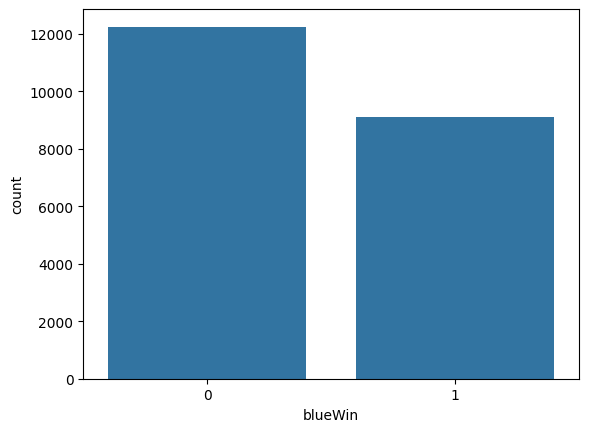

In [4]:
sns.countplot(x='blueWin', data=df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('blueWin', axis=1), df['blueWin'], test_size=0.30, random_state=200)

In [7]:
# MULTIBLE DIMENSTIONAL LOGISIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

In [10]:
# test_data = {'blueTeamTotalKills': [int(input('Input the total kills diffrence between the two teams: '))],
#         'blueTeamDragonKills': [int(input('Input the total Dragon kills diffrence between the two teams: '))],
#         'blueTeamHeraldKills': [int(input('Input the total Herald kills diffrence between the two teams: '))],
#         'blueTeamTotalGold':[int(input('Input the total Gold diffrence between the two teams: '))],
#         'blueTeamXp':[int(input('Input the total XP diffrence between the two teams: '))],
#         'blueTeamTotalDamageToChamps':[int(input('Input the total Damage dealt diffrence between the two teams: '))],
#         }
test_data = pd.DataFrame(x_test)
predictions = log_model.predict(test_data)
# if predictions[0] == 1:
#   print('Blue team won')
# else:
#   print('Red team won')
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
accurecy = accuracy_score(y_test, predictions)
accurecy

0.8564070547838302

In [14]:
from sklearn.metrics import f1_score
f1_score(y_test, predictions)

0.8328488372093024